### **Required Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **ML Library**

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Set matplotlib style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

### **Load and Explore Dataset**

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Durgeshsingh12712/Data-All/refs/heads/main/Unified%20Dataset/youtube_channel_real_performance_analytics.csv")
data.head()


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Transaction Revenue (USD),Transactions,Revenue from Transactions (USD),Reactions,Chat Messages Count,Reminders Set,Stream Hours,Remix Views,Remix Count,Subscribers from Posts,New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,Returned Items (USD),Unconfirmed Commissions (USD),Approved Commissions (USD),Orders,Total Sales Volume (USD),End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Returning Viewers,New Viewers,Average Views per User,Unique Viewers,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,0.857,35.0,0.016,0.000,0.030,0.016,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,94.02,14.0,220.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6667,20.0,0.0640,0.0000,0.0,0.0711,20.0,0.0,0.0,0.0,0.0,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,7.0,76.98,180.0,602.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6667,10.0,0.0611,0.0000,0.0,0.2519,39.0,0.0,0.0,0.0,0.0,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [6]:
data.shape

(364, 70)

In [7]:
len(data.columns)

70

In [8]:
data.memory_usage(deep=True).sum()

249139

In [9]:
data.columns.tolist()

['ID',
 'Video Duration',
 'Video Publish Time',
 'Days Since Publish',
 'Day',
 'Month',
 'Year',
 'Day of Week',
 'Revenue per 1000 Views (USD)',
 'Monetized Playbacks (Estimate)',
 'Playback-Based CPM (USD)',
 'CPM (USD)',
 'Ad Impressions',
 'Estimated AdSense Revenue (USD)',
 'DoubleClick Revenue (USD)',
 'YouTube Ads Revenue (USD)',
 'Watch Page Ads Revenue (USD)',
 'YouTube\xa0Premium (USD)',
 'Transaction Revenue (USD)',
 'Transactions',
 'Revenue from Transactions (USD)',
 'Reactions',
 'Chat Messages Count',
 'Reminders Set',
 'Stream Hours',
 'Remix Views',
 'Remix Count',
 'Subscribers from Posts',
 'New Comments',
 'Shares',
 'Like Rate (%)',
 'Dislikes',
 'Likes',
 'Unsubscribes',
 'New Subscribers',
 'Returned Items (USD)',
 'Unconfirmed Commissions (USD)',
 'Approved Commissions (USD)',
 'Orders',
 'Total Sales Volume (USD)',
 'End Screen Click-Through Rate (%)',
 'End Screen Impressions',
 'End Screen Clicks',
 'Teaser Click-Through Rate (%)',
 'Teaser Impressions',
 '

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [10]:
data.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Transaction Revenue (USD),Transactions,Revenue from Transactions (USD),Reactions,Chat Messages Count,Reminders Set,Stream Hours,Remix Views,Remix Count,Subscribers from Posts,New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,Returned Items (USD),Unconfirmed Commissions (USD),Approved Commissions (USD),Orders,Total Sales Volume (USD),End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Returning Viewers,New Viewers,Average Views per User,Unique Viewers,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,15117.953297,7.811525,0.635734,15.363964,8.447223,0.404810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333.846154,252.958791,97.339203,123.961538,5526.733516,28.906593,349.931319,0.0,0.0,0.0,0.0,0.0,1.551676,6561.980769,224.934066,0.324725,4131.986264,81.318681,3.291044,142.689560,19.115385,2.644910,300.810440,24.830608,0.068246,5.923077,115.206959,1303.763736,0.0,0.0,0.0,0.0,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,24339.924215,12.778813,1.393079,23.614172,12.993395,0.595196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.934648,363.016405,2.308451,128.311620,4465.210998,48.591932,468.539050,0.0,0.0,0.0,0.0,0.0,3.031638,14829.019211,787.523948,0.923491,13523.976449,352.030814,10.338442,669.114645,82.516801,1.917453,555.976093,38.958396,0.209388,14.290941,128.827059,1343.028080,0.0,0.0,0.0,0.0,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,76.980000,2.000000,121.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,368.500000,0.167000,0.000000,0.344500,0.171500,0.005000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.750000,38.000000,96.597500,27.000000,1205.500000,3.000000,44.500000,0.0,0.0,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0

#### **Target Variable**

In [11]:
revenue_columns = [col for col in data.columns if 'revenue' in col.lower() or 'earning' in col.lower() or 'income' in col.lower()]
print(f"Potential revenue columns found: {revenue_columns}")

Potential revenue columns found: ['Revenue per 1000 Views (USD)', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'Transaction Revenue (USD)', 'Revenue from Transactions (USD)', 'Estimated Revenue (USD)']


In [12]:
if not revenue_columns:
    print("No direct revenue columns found. Looking for potential proxy variables...")
    potential_targets = [col for col in data.columns if any(word in col.lower() 
                        for word in ['views', 'subscriber', 'watch', 'monetiz', 'cpm', 'rpm'])]
    print(f"Potential target variables: {potential_targets}")

In [13]:
data.dtypes

ID                           int64
Video Duration             float64
Video Publish Time          object
Days Since Publish           int64
Day                          int64
                            ...   
Watch Time (hours)         float64
Subscribers                float64
Estimated Revenue (USD)    float64
Impressions                float64
Video Thumbnail CTR (%)    float64
Length: 70, dtype: object

In [14]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(data[numeric_cols].describe())
else:
    print("No numeric columns found!")

               ID  Video Duration  Days Since Publish         Day       Month  \
count  364.000000      364.000000          364.000000  364.000000  364.000000   
mean   181.500000      664.239011            8.406593   15.807692    6.642857   
std    105.221988      330.646183           15.371239    8.924004    3.421521   
min      0.000000        9.000000            0.000000    1.000000    1.000000   
25%     90.750000      496.000000            3.000000    8.000000    4.000000   
50%    181.500000      613.000000            5.000000   16.000000    7.000000   
75%    272.250000      786.500000            9.000000   23.000000   10.000000   
max    363.000000     2311.000000          260.000000   31.000000   12.000000   

              Year  Revenue per 1000 Views (USD)  \
count   364.000000                    364.000000   
mean   2018.736264                      0.112283   
std       2.530629                      0.179668   
min    2016.000000                      0.000000   
25%    201

### **Data Preprocessing and Cleaning**

In [16]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"\nMissing values count: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("Missing values per column:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")


Missing values count: 0
No missing values found!


In [18]:
# Handle datetime columns if they exist
datetime_columns = [col for col in data.columns if 'time' in col.lower() or 'date' in col.lower()]
if datetime_columns:
    print(f"\nFound datetime columns: {datetime_columns}")
    for col in datetime_columns:
        try:
            data[col] = pd.to_datetime(data[col])
            print(f"Converted {col} to datetime")
            
            # Extract datetime features
            data[f'{col}_Year'] = data[col].dt.year
            data[f'{col}_Month'] = data[col].dt.month
            data[f'{col}_Day'] = data[col].dt.day
            data[f'{col}_Hour'] = data[col].dt.hour
            data[f'{col}_Weekday'] = data[col].dt.weekday
            
        except Exception as e:
            print(f"Could not convert {col} to datetime: {e}")


Found datetime columns: ['Video Publish Time', 'Playlist Watch Time (hours)', 'Clip Watch Time (hours)', 'YouTube Premium Watch Time (hours)', 'Watch Time (hours)', 'Video Publish Time_Year', 'Video Publish Time_Month', 'Video Publish Time_Day', 'Video Publish Time_Hour', 'Video Publish Time_Weekday', 'Playlist Watch Time (hours)_Year', 'Playlist Watch Time (hours)_Month', 'Playlist Watch Time (hours)_Day', 'Playlist Watch Time (hours)_Hour', 'Playlist Watch Time (hours)_Weekday', 'Clip Watch Time (hours)_Year', 'Clip Watch Time (hours)_Month', 'Clip Watch Time (hours)_Day', 'Clip Watch Time (hours)_Hour', 'Clip Watch Time (hours)_Weekday', 'YouTube Premium Watch Time (hours)_Year', 'YouTube Premium Watch Time (hours)_Month', 'YouTube Premium Watch Time (hours)_Day', 'YouTube Premium Watch Time (hours)_Hour', 'YouTube Premium Watch Time (hours)_Weekday', 'Watch Time (hours)_Year', 'Watch Time (hours)_Month', 'Watch Time (hours)_Day', 'Watch Time (hours)_Hour', 'Watch Time (hours)_Week

In [19]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in datetime_columns]

In [20]:
label_encoders = {}
for col in categorical_columns:
    if data[col].nunique() < 50: 
        label_encoders[col] = LabelEncoder()
        data[col + '_encoded'] = label_encoders[col].fit_transform(data[col].astype(str))
        print(f"Encoded {col}")

Encoded Day of Week


In [21]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

print(f"\nFinal dataset shape: {data.shape}")


Duplicate rows: 0

Final dataset shape: (364, 221)


In [22]:
print("Since the exact column name for revenue/target variable is unclear,")
print("please specify which column you want to predict.")
print(f"\nAvailable numeric columns that could be targets:")

numeric_columns = data.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_columns, 1):
    print(f"{i}. {col}")

print("1. Look at the columns above")
print("2. Identify which column represents your target variable (what you want to predict)")
print("3. Update the TARGET_COLUMN variable below")

Since the exact column name for revenue/target variable is unclear,
please specify which column you want to predict.

Available numeric columns that could be targets:
1. ID
2. Video Duration
3. Days Since Publish
4. Day
5. Month
6. Year
7. Revenue per 1000 Views (USD)
8. Monetized Playbacks (Estimate)
9. Playback-Based CPM (USD)
10. CPM (USD)
11. Ad Impressions
12. Estimated AdSense Revenue (USD)
13. DoubleClick Revenue (USD)
14. YouTube Ads Revenue (USD)
15. Watch Page Ads Revenue (USD)
16. YouTube Premium (USD)
17. Transaction Revenue (USD)
18. Transactions
19. Revenue from Transactions (USD)
20. Reactions
21. Chat Messages Count
22. Reminders Set
23. Stream Hours
24. Remix Views
25. Remix Count
26. Subscribers from Posts
27. New Comments
28. Shares
29. Like Rate (%)
30. Dislikes
31. Likes
32. Unsubscribes
33. New Subscribers
34. Returned Items (USD)
35. Unconfirmed Commissions (USD)
36. Approved Commissions (USD)
37. Orders
38. Total Sales Volume (USD)
39. End Screen Click-Through R

In [23]:
TARGET_COLUMN = None

if TARGET_COLUMN is None:
    if len(numeric_columns) > 0:
        TARGET_COLUMN = numeric_columns[0]
        print(f"\nFor demonstration, using '{TARGET_COLUMN}' as target variable")
    else:
        print("No numeric columns available for prediction!")
        TARGET_COLUMN = None


For demonstration, using 'ID' as target variable


### **Exploratory Data Analysis (EDA)**

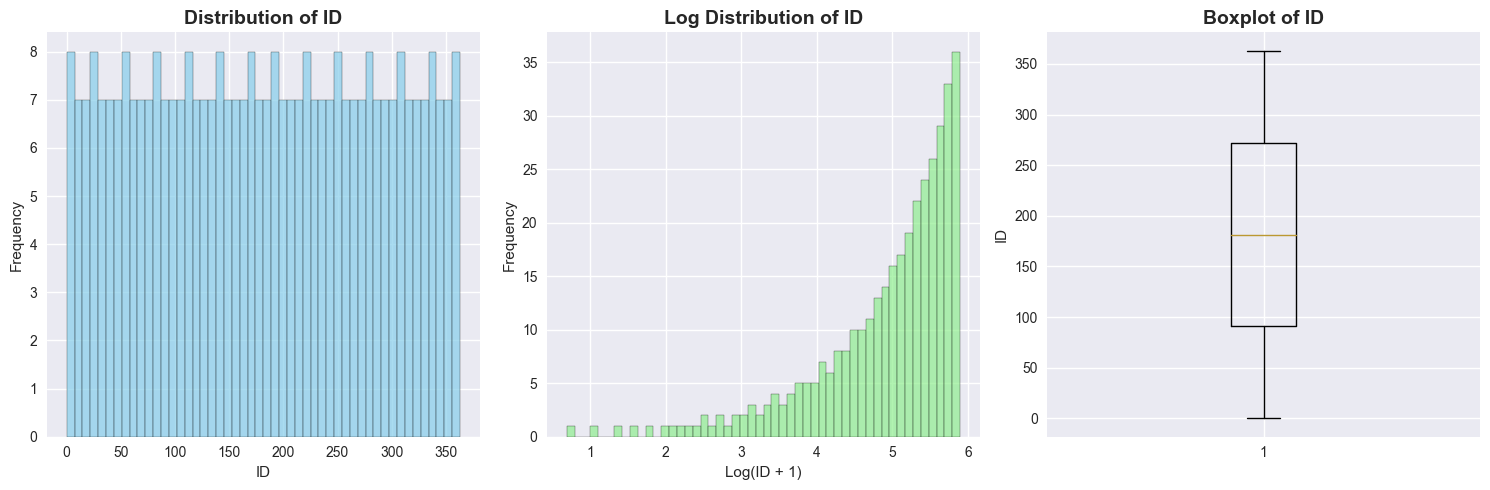

In [24]:
if TARGET_COLUMN and TARGET_COLUMN in data.columns:
    # Target variable analysis
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(data[TARGET_COLUMN].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {TARGET_COLUMN}', fontsize=14, fontweight='bold')
    plt.xlabel(TARGET_COLUMN)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    # Handle potential zero values for log transform
    target_values = data[TARGET_COLUMN].dropna()
    target_values = target_values[target_values > 0]  # Remove zero/negative values
    if len(target_values) > 0:
        plt.hist(np.log1p(target_values), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.title(f'Log Distribution of {TARGET_COLUMN}', fontsize=14, fontweight='bold')
        plt.xlabel(f'Log({TARGET_COLUMN} + 1)')
        plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.boxplot(data[TARGET_COLUMN].dropna())
    plt.title(f'Boxplot of {TARGET_COLUMN}', fontsize=14, fontweight='bold')
    plt.ylabel(TARGET_COLUMN)
    
    plt.tight_layout()
    plt.show()


Top 10 Features Correlated with ID:
Year                            0.913222
Like Rate (%)                   0.636681
YouTube Premium (USD)           0.502428
YouTube Premium Views           0.471847
Average View Duration           0.464430
End Screen Impressions          0.456076
Revenue per 1000 Views (USD)    0.425593
Card Click-Through Rate (%)     0.362390
Clip Views                      0.317951
Likes                           0.312734
Name: ID, dtype: float64


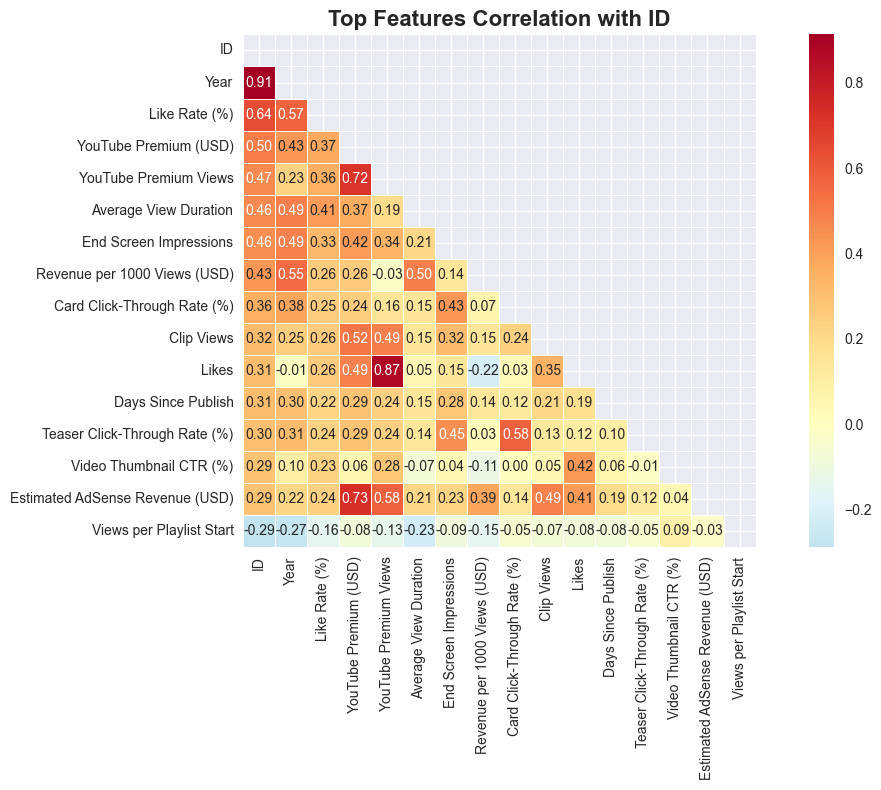

In [25]:
# Correlation analysis
numeric_data = data.select_dtypes(include=[np.number])
if len(numeric_data.columns) > 1:
    correlation_matrix = numeric_data.corr()
        
# Top correlations with target variable
    if TARGET_COLUMN in correlation_matrix.columns:
        target_correlations = correlation_matrix[TARGET_COLUMN].abs().sort_values(ascending=False)
        print(f"\nTop 10 Features Correlated with {TARGET_COLUMN}:")
        print(target_correlations.head(11)[1:])  # Exclude self-correlation
            
        # Heatmap of top correlations
        plt.figure(figsize=(12, 8))
        top_features = target_correlations.head(16).index  # Top 15 + target
        top_corr_matrix = correlation_matrix.loc[top_features, top_features]
            
        mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
        sns.heatmap(top_corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                        square=True, linewidths=0.5, fmt='.2f')
        plt.title(f'Top Features Correlation with {TARGET_COLUMN}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

### **Feature Engineering and Selection**

In [26]:
if TARGET_COLUMN and TARGET_COLUMN in data.columns:
    feature_columns = [col for col in numeric_columns if col != TARGET_COLUMN]
    if len(feature_columns) >= 2:
        # Create ratio features (example)
        for i in range(min(3, len(feature_columns))):
            for j in range(i+1, min(4, len(feature_columns))):
                col1, col2 = feature_columns[i], feature_columns[j]
                # Avoid division by zero
                data[f'{col1}_per_{col2}'] = data[col1] / (data[col2] + 1e-8)
        
        print("Created ratio features")

Created ratio features


In [27]:
# Create categorical features based on quantiles
for col in feature_columns[:5]:
    if data[col].nunique() > 10:
        data[f'{col}_high'] = (data[col] > data[col].median()).astype(int)
    
print("Created categorical features based on medians")

Created categorical features based on medians


### **Model Preparation and Training**

In [28]:
if TARGET_COLUMN and TARGET_COLUMN in data.columns:
    y = data[TARGET_COLUMN].dropna()
    
    # Get corresponding X values (remove rows where target is NaN)
    valid_indices = data[TARGET_COLUMN].notna()
    X_data = data[valid_indices]
    
    # Select only numeric columns for features
    X_numeric = X_data.select_dtypes(include=[np.number])
    X = X_numeric.drop(columns=[TARGET_COLUMN], errors='ignore')
    
    combined_data = pd.concat([X, y], axis=1).dropna()
    X = combined_data.iloc[:, :-1]
    y = combined_data.iloc[:, -1]
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target variable shape: {y.shape}")

Feature matrix shape: (364, 199)
Target variable shape: (364,)


In [29]:
if len(X) > 10 and len(X.columns) > 0:
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")
        
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42)
    }

Training set: (291, 199)
Testing set: (73, 199)


In [30]:
# Train and evaluate models
results = {}
predictions_dict = {}
        
for name, model in models.items():
        
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [31]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [32]:
# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
                
results[name] = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R²': r2,
    'CV_Mean': cv_scores.mean(),
    'CV_Std': cv_scores.std()
}
                
predictions_dict[name] = y_pred

In [33]:
print(f"{name} completed:")
print(f"   MAE: {mae:.6f}")
print(f"   RMSE: {rmse:.6f}")
print(f"   R²: {r2:.6f}")
print(f"   CV R² (mean±std): {cv_scores.mean():.6f}±{cv_scores.std():.6f}")

Gradient Boosting completed:
   MAE: 7.463583
   RMSE: 11.416621
   R²: 0.989987
   CV R² (mean±std): 0.983796±0.008395


### **Results and Visualization**

In [34]:
if results:
    results_df = pd.DataFrame(results).T
    results_df = results_df.sort_values('R²', ascending=False)
    print(results_df.round(6))

                    CV_Mean    CV_Std       MAE         MSE       RMSE  \
Gradient Boosting  0.983796  0.008395  7.463583  130.339239  11.416621   

                         R²  
Gradient Boosting  0.989987  


In [35]:
# Find best model
best_model_name = results_df.index[0]
print(f"\nBest Model: {best_model_name}")
print(f"   R² Score: {results_df.loc[best_model_name, 'R²']:.6f}")


Best Model: Gradient Boosting
   R² Score: 0.989987


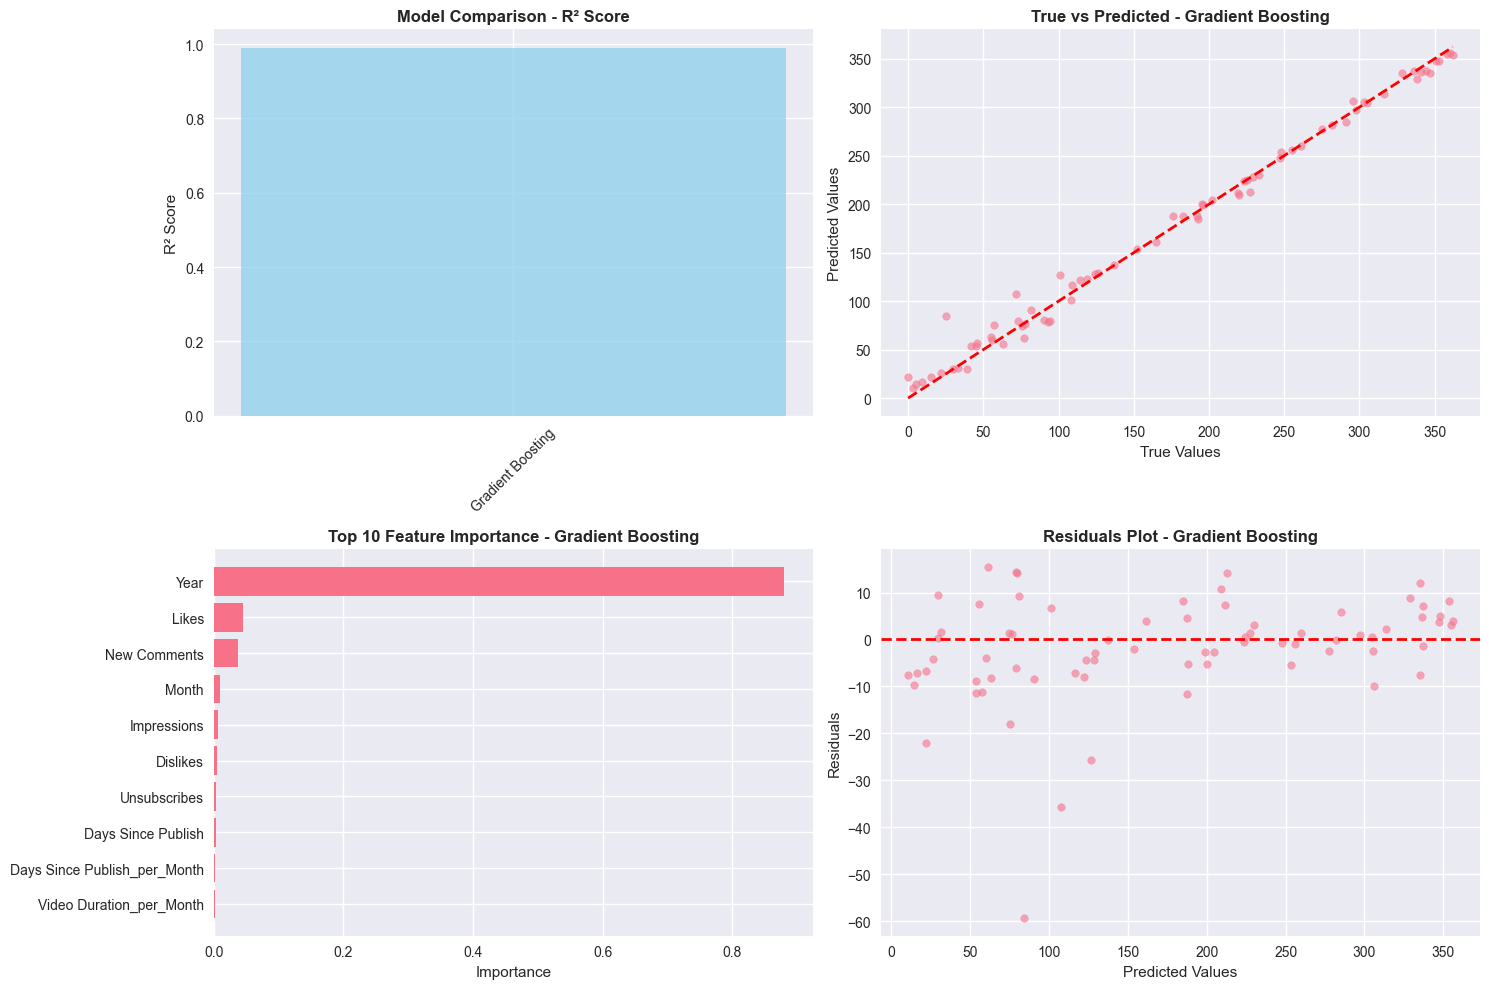

In [36]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
# Model comparison
axes[0,0].bar(results_df.index, results_df['R²'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Model Comparison - R² Score', fontweight='bold')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)
            
# True vs Predicted for best model
best_predictions = predictions_dict[best_model_name]
axes[0,1].scatter(y_test, best_predictions, alpha=0.6, s=30)
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0,1].set_xlabel('True Values')
axes[0,1].set_ylabel('Predicted Values')
axes[0,1].set_title(f'True vs Predicted - {best_model_name}', fontweight='bold')
            
# Feature importance (if available)
best_model = models[best_model_name]
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
                
    axes[1,0].barh(feature_importance['feature'], feature_importance['importance'])
    axes[1,0].set_title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
    axes[1,0].set_xlabel('Importance')
    axes[1,0].invert_yaxis()
            
# Residuals plot
residuals = y_test - best_predictions
axes[1,1].scatter(best_predictions, residuals, alpha=0.6, s=30)
axes[1,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title(f'Residuals Plot - {best_model_name}', fontweight='bold')
            
plt.tight_layout()
plt.show()

In [37]:
print(f"\nKey Insights:")
print(f"Target Variable: {TARGET_COLUMN}")
print(f"Best Model: {best_model_name}")
print(f"Best R² Score: {results_df.loc[best_model_name, 'R²']:.6f}")
print(f"Total Features Used: {len(X.columns)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Key Insights:
Target Variable: ID
Best Model: Gradient Boosting
Best R² Score: 0.989987
Total Features Used: 199
Training Samples: 291
Testing Samples: 73
